In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N_SAMPLES = 200
N_HIDDEN = 300
LR = 0.01

In [3]:
# training data
x = torch.unsqueeze(torch.linspace(-10, 10, int(N_SAMPLES * 0.8)), 1)
noise = np.random.normal(-10, 20, x.shape)
y = np.square(x) + torch.FloatTensor(noise)
# y = x + 10*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))  # (means=0, std=1)

# test data
test_x = torch.unsqueeze(torch.linspace(-10, 10, int(N_SAMPLES * 0.2)), 1)
noise = np.random.normal(-1, 1, test_x.shape)
test_y = np.square(test_x) + torch.FloatTensor(noise)
# test_y = test_x + 0.7*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))  # (means=0, std=1)

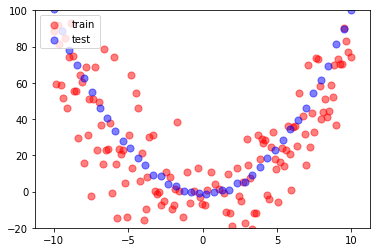

In [4]:
# show data
plt.scatter(x.data.numpy(), y.data.numpy(), c='red', s=50, alpha=0.5, label='train')
plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='blue', s=50, alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-20, 100))
plt.show()

In [5]:
net_overfit = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1),
)

In [6]:
print(net_overfit)

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=1, bias=True)
)


In [7]:
net_dropout = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(N_HIDDEN, 1),
)

In [8]:
print(net_dropout)

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5)
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.5)
  (6): Linear(in_features=300, out_features=1, bias=True)
)


In [9]:
optimizer_overfit = torch.optim.Adam(net_overfit.parameters(), lr=LR)
optimizer_dropout = torch.optim.Adam(net_dropout.parameters(), lr=LR)
loss_func = torch.nn.MSELoss()

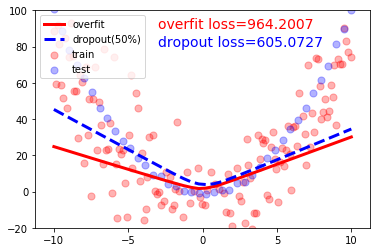

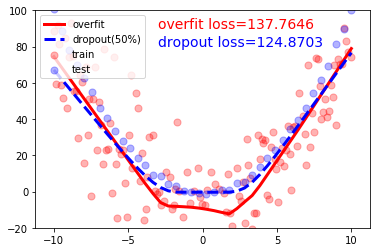

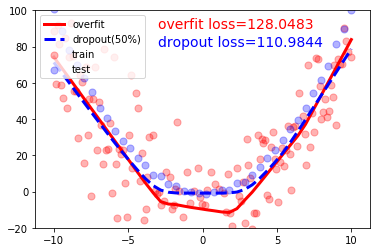

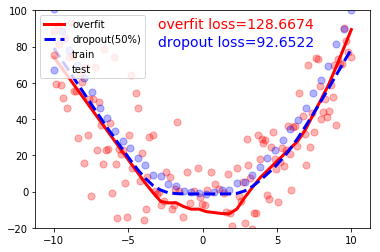

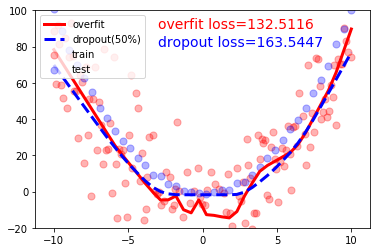

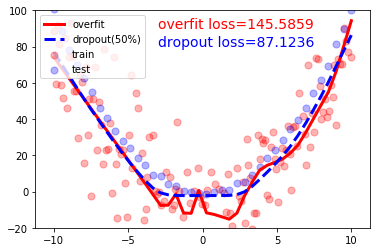

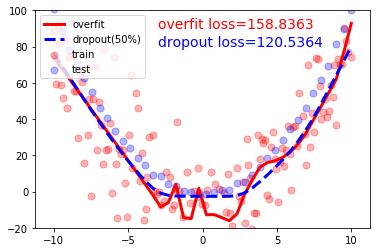

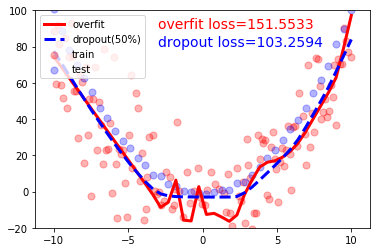

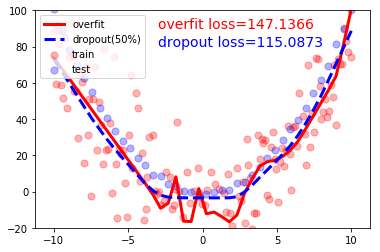

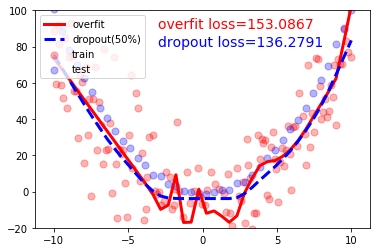

In [10]:
plt.ion()

for t in range(1000):
    pred_overfit = net_overfit(x)
    pred_dropout = net_dropout(x)
    loss_overfit = loss_func(pred_overfit, y)
    loss_dropout = loss_func(pred_dropout, y)

    optimizer_overfit.zero_grad()
    optimizer_dropout.zero_grad()
    loss_overfit.backward()
    loss_dropout.backward()
    optimizer_overfit.step()
    optimizer_dropout.step()

    if t % 100 == 0:
        # change to eval mode in order to ignore dropout
        net_overfit.eval()
        net_dropout.eval()

        # plotting
        test_pred_overfit = net_overfit(test_x)
        test_pred_dropout = net_dropout(test_x)
        
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy(), c='red', s=50, alpha=0.3, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='blue', s=50, alpha=0.3, label='test')
        plt.plot(test_x.data.numpy(), test_pred_overfit.data.numpy(), 'r-', lw=3, label='overfit')
        plt.plot(test_x.data.numpy(), test_pred_dropout.data.numpy(), 'b--', lw=3, label='dropout(50%)')
        plt.text(-3, 90, 'overfit loss=%.4f' % loss_func(test_pred_overfit, test_y).data.numpy(), fontdict={'size': 14, 'color':  'red'})
        plt.text(-3, 80, 'dropout loss=%.4f' % loss_func(test_pred_dropout, test_y).data.numpy(), fontdict={'size': 14, 'color': 'blue'})
        plt.legend(loc='upper left'); plt.ylim((-20, 100));plt.pause(0.1)

        # change back to train mode
        net_overfit.train()
        net_dropout.train()

plt.ioff()